- ### Planteamiento del problema:

¿Qué tipo de usuario tiene mayor probabilidad de hacerse parte de un depósito a largo plazo?

In [1]:
# Se importa el dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
dataframe = pd.read_csv(url, sep = ';')

- ### Exploración y limpieza de datos:

In [2]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')
print()
print(dataframe.info())

Filas: 41188 | Columnas: 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  co

In [3]:
dataframe.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
print(dataframe.head(2))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  

[2 rows x 21 columns]


In [5]:
dataframe.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las clases.
- Hay 41.188 registros y 21 clases incluyendo la clase a predecir.
- Hay 11 variables categóricas y 10 numéricas.

In [6]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated().sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 12 registros duplicados.
El % de registros "duplicados" es 0.0002913469942701758.


In [7]:
# Se eliminan los registros duplicados

dataframe.drop_duplicates(inplace = True)

print(f'Se eliminaron {filas-(dataframe.shape[0])} duplicados')

Se eliminaron 12 duplicados


Inicialmente todas las clases parecen relevantes respecto a la variable a predecir. Es por ello que no se eliminará ninguna.

- ### Análisis univariante:

##### Para variables categóricas

/tmp/ipykernel_34611/2112555418.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_34611/2112555418.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')


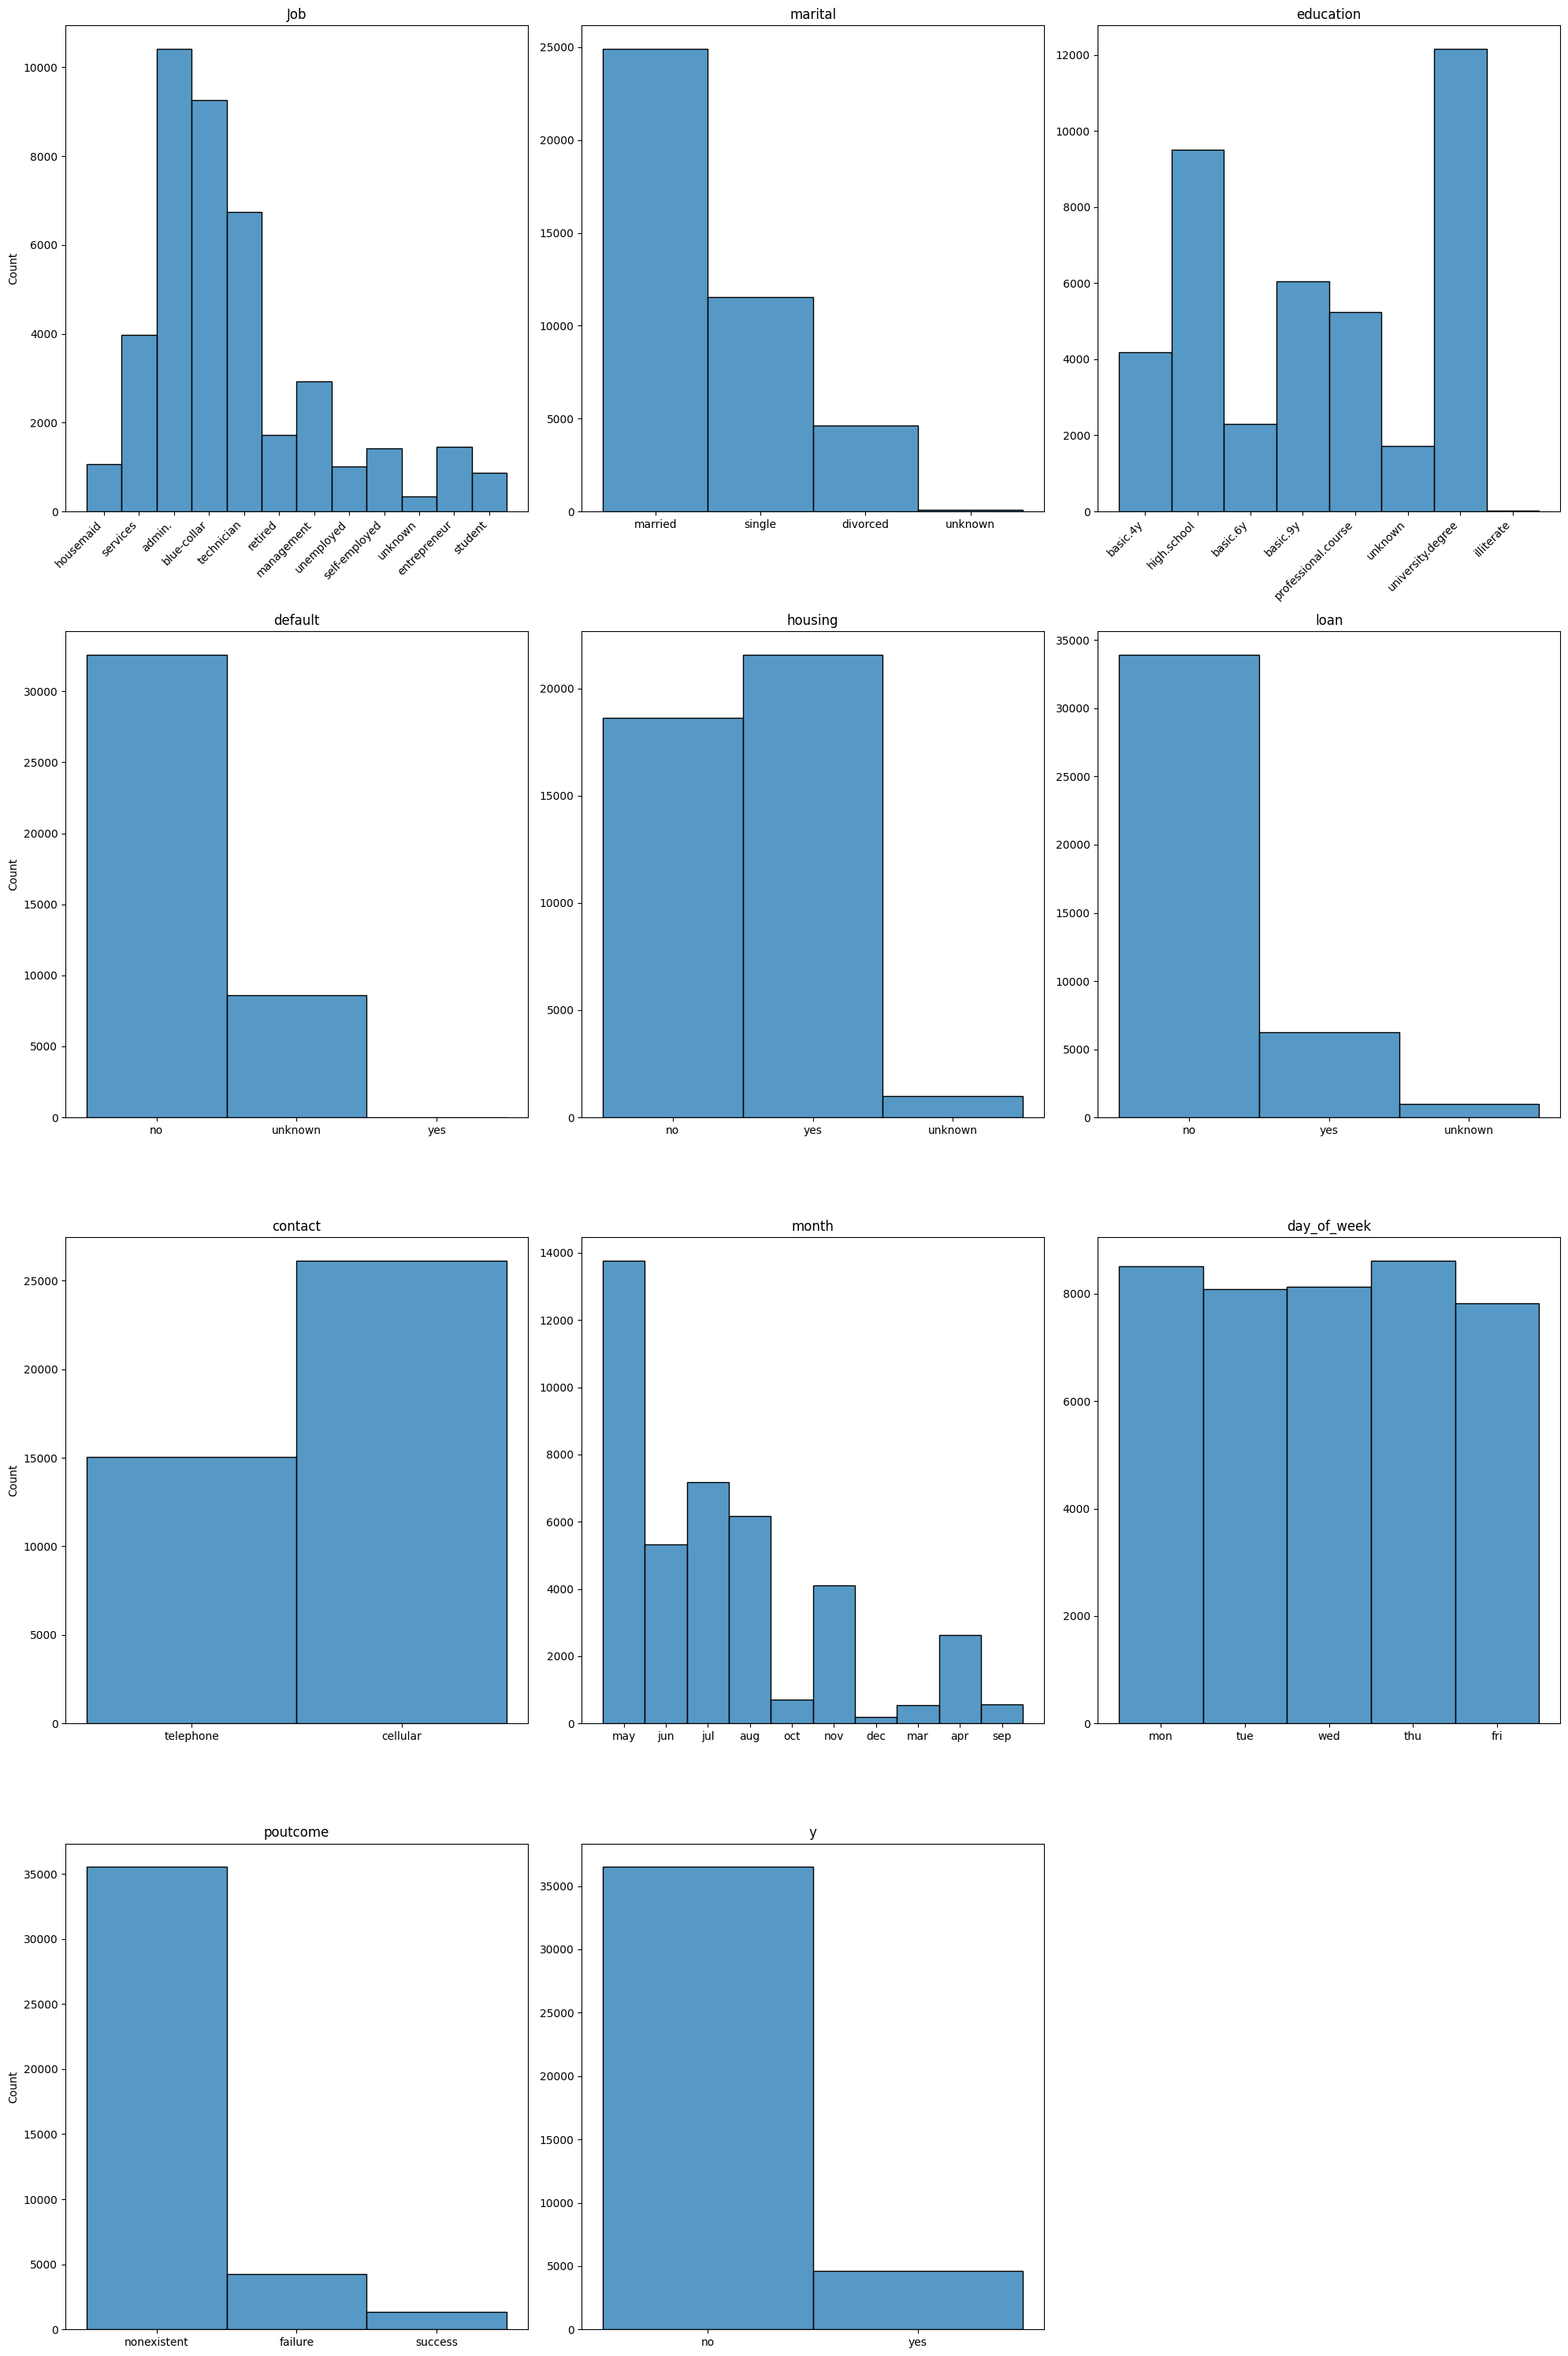

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4,3, figsize = (20, 30))

sns.histplot(ax = axis[0, 0], data = dataframe, x = 'job').set(xlabel = None, title = 'Job')
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
sns.histplot(ax = axis[0, 1], data = dataframe, x = 'marital').set(ylabel = None, xlabel = None, title = 'marital')
sns.histplot(ax = axis[0, 2], data = dataframe, x = 'education').set(ylabel = None, xlabel = None, title = 'education')
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')


sns.histplot(ax = axis[1, 0], data = dataframe, x = 'default').set(xlabel = None, title = 'default')
sns.histplot(ax = axis[1, 1], data = dataframe, x = 'housing').set(ylabel = None, xlabel = None, title = 'housing')
sns.histplot(ax = axis[1, 2], data = dataframe, x = 'loan').set(ylabel = None, xlabel = None, title = 'loan')

sns.histplot(ax = axis[2, 0], data = dataframe, x = 'contact').set(xlabel = None, title = 'contact')
sns.histplot(ax = axis[2, 1], data = dataframe, x = 'month').set(ylabel = None, xlabel = None, title = 'month')
sns.histplot(ax = axis[2, 2], data = dataframe, x = 'day_of_week').set(ylabel = None, xlabel = None, title = 'day_of_week')

sns.histplot(ax = axis[3, 0], data = dataframe, x = 'poutcome').set(xlabel = None, title = 'poutcome')
sns.histplot(ax = axis[3, 1], data = dataframe, x = 'y').set(ylabel = None, xlabel = None, title = 'y')

fig.delaxes(axis[3, 2])

plt.tight_layout()

plt.show()

In [9]:
credito_yes = dataframe[dataframe['default']=='yes']['default'].value_counts().get('yes', 0)
print(f"La cantidad de clientes sin crédito vigente es {credito_yes}")

La cantidad de clientes sin crédito vigente es 3


In [10]:
loan_no = dataframe[dataframe['loan']=='no']['loan'].value_counts().get('no', 0)
loan_yes = dataframe[dataframe['loan']=='yes']['loan'].value_counts().get('yes', 0)
print(f"La relación entre los que no tienen crédito personal y los que lo tienen es de {round(loan_no/loan_yes,2)}")

La relación entre los que no tienen crédito personal y los que lo tienen es de 5.43


In [11]:
poutcome_failure = dataframe[dataframe['poutcome']=='failure']['poutcome'].value_counts().get('failure', 0)
poutcome_success = dataframe[dataframe['poutcome']=='success']['poutcome'].value_counts().get('success', 0)
print(f"La relación entre los que resultó un fracaso la campaña y los que resultó un "
      f"éxito fue de {round(poutcome_failure/poutcome_success,2)}")

La relación entre los que resultó un fracaso la campaña y los que resultó un éxito fue de 3.1


- Los trabajos más populares son admin., blue-collar, technician y services. El top 3 de trabajos más populares tienen el doble o más de personas.
- La mayoría están casados, luego vienen los solteros y por último los divorciados.
- El top 3 de educación es university.degree, high-school y basic-9y de más popular a menos popular.
- La gran mayoría de los clientes no tienen créditos vigentes, sólo tres tienen créditos vigentes.
- La mayoría tiene préstamo para casa y un poco menos no lo tienen.
- Los que no tienen crédito personal son alrededor 5.4 veces que los que tienen.
- El contacto con la mayoría es vía celular.
- La inmensa mayoría fue contactado por última vez en el mes de mayo.
- Está muy parejo los días de la semana en que ocurrió el último contacto.
- En la mayoría de los casos no había campaña de marketing previa. Y para los que existió campaña previa los fracasos fueron el triple que los éxitos.
- La inmensa mayoría de los clientes no optaron por un depósito a largo plazo.

##### Para variables numéricas

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspa

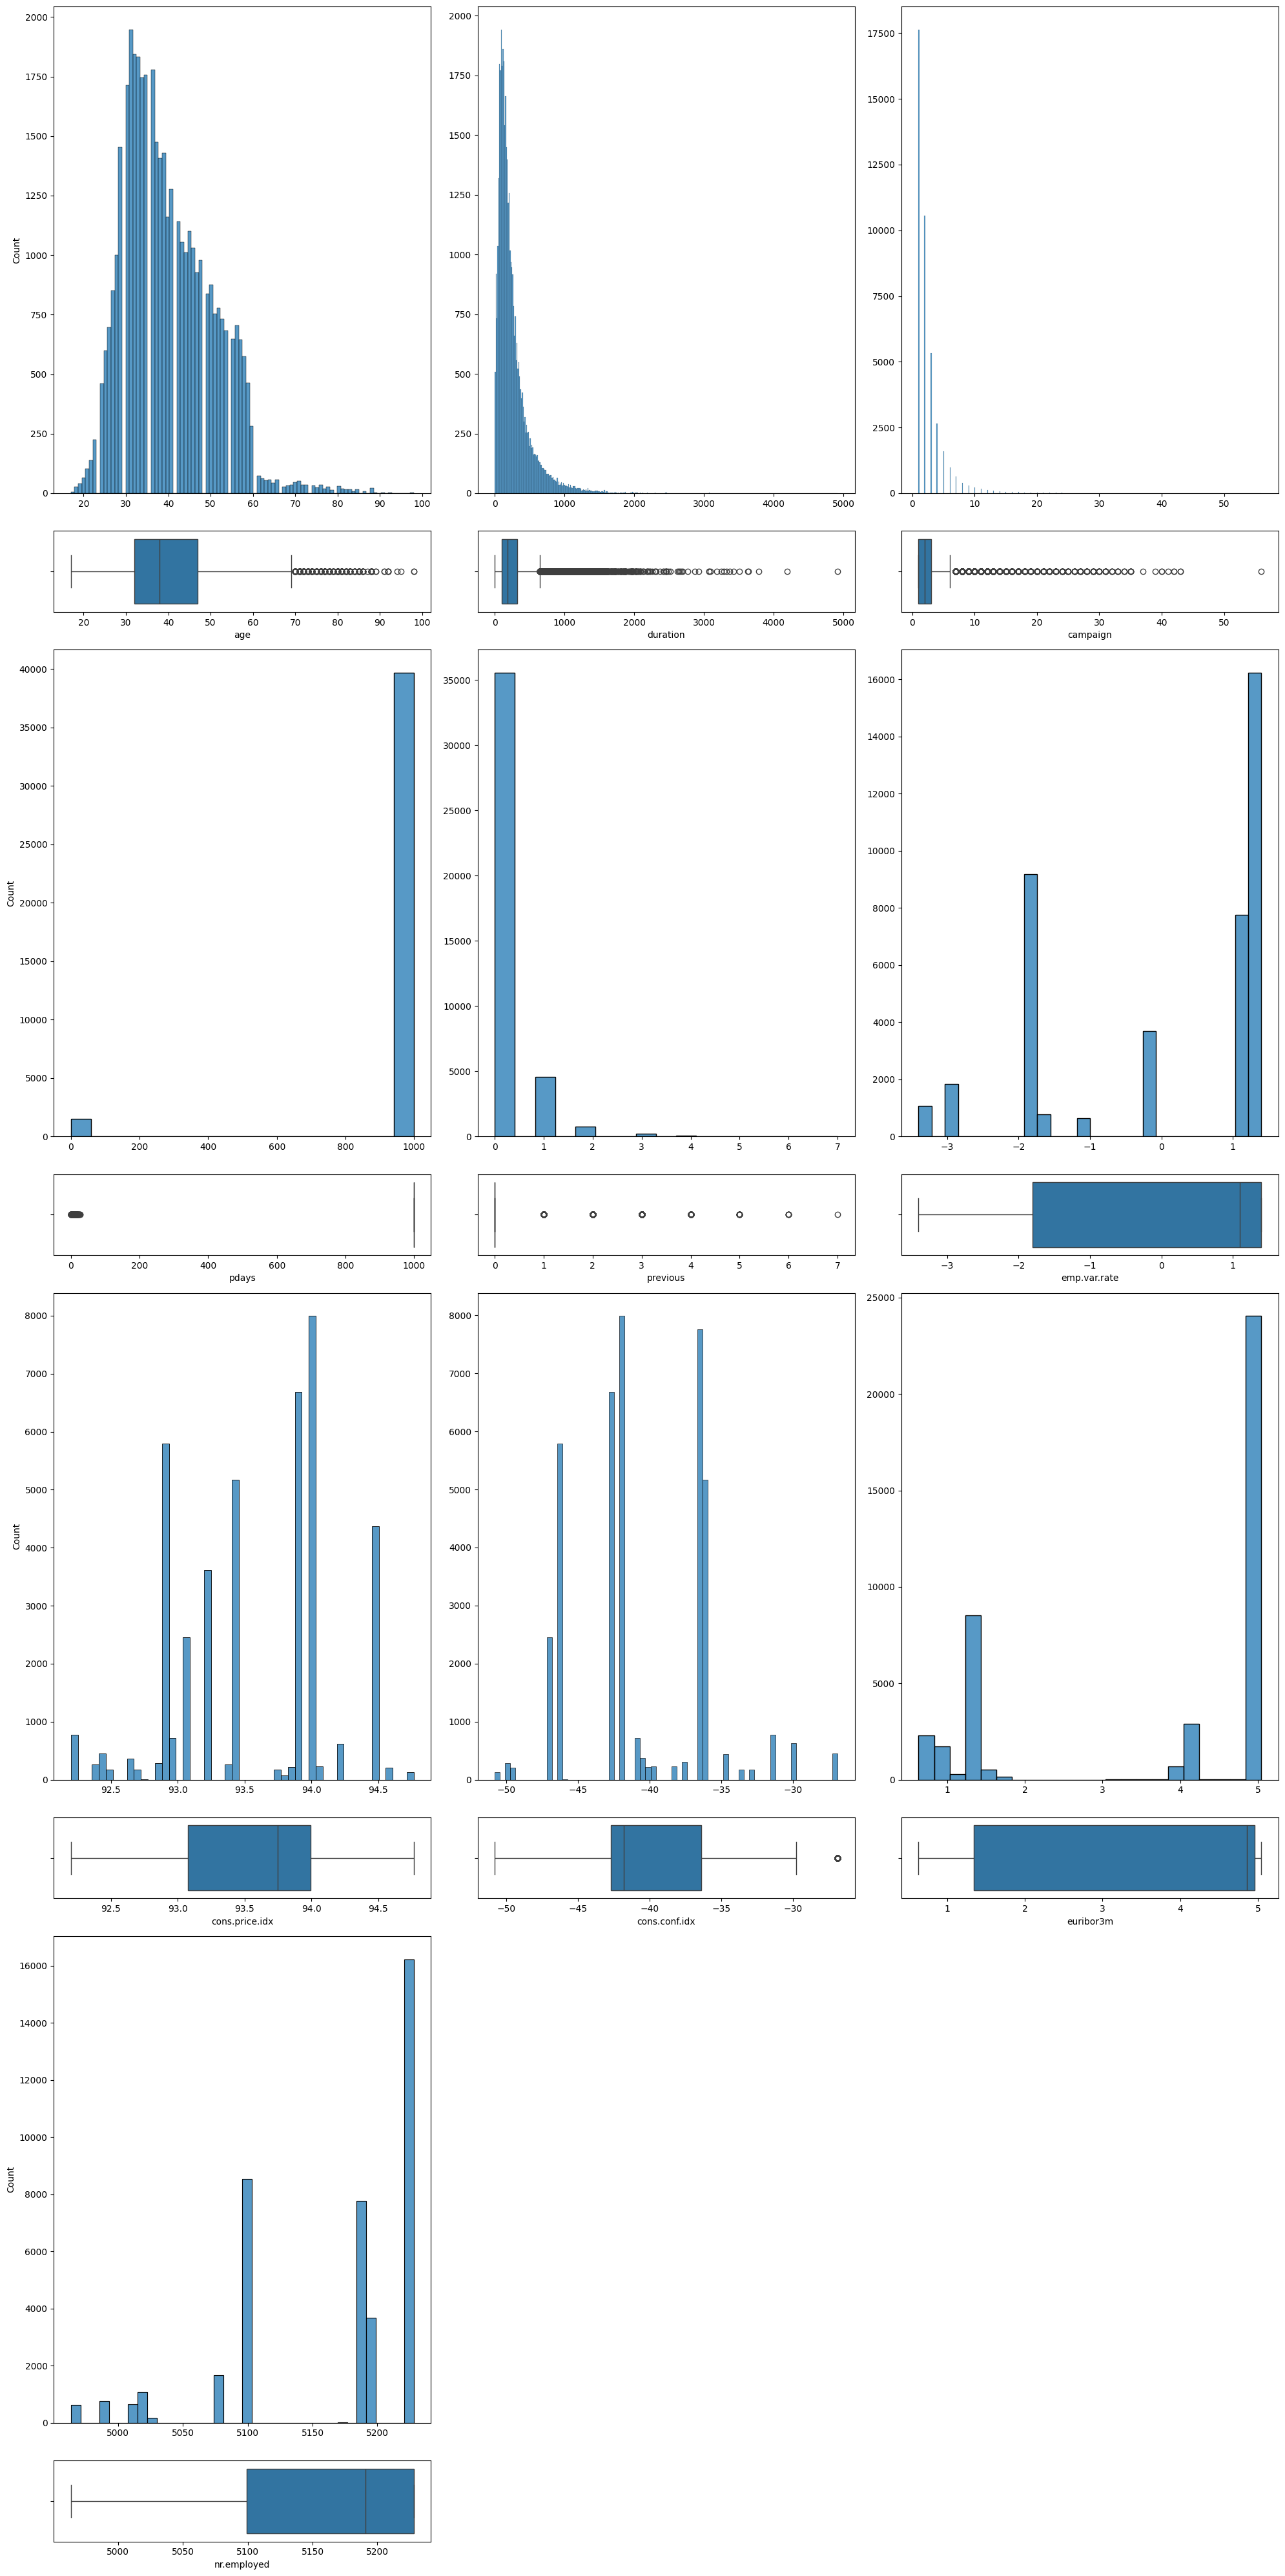

In [12]:
fig, axis = plt.subplots(8, 3, figsize = (20,40), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0,0], data = dataframe, x = 'age').set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = dataframe, x = 'age')

sns.histplot(ax = axis[0,1], data = dataframe, x = 'duration').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = dataframe, x = 'duration')

sns.histplot(ax = axis[0,2], data = dataframe, x = 'campaign').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,2], data = dataframe, x = 'campaign')

####

sns.histplot(ax = axis[2,0], data = dataframe, x = 'pdays').set(xlabel = None)
sns.boxplot(ax = axis[3,0], data = dataframe, x = 'pdays')

sns.histplot(ax = axis[2,1], data = dataframe, x = 'previous').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,1], data = dataframe, x = 'previous')

sns.histplot(ax = axis[2,2], data = dataframe, x = 'emp.var.rate').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,2], data = dataframe, x = 'emp.var.rate')

####

sns.histplot(ax = axis[4,0], data = dataframe, x = 'cons.price.idx').set(xlabel = None)
sns.boxplot(ax = axis[5,0], data = dataframe, x = 'cons.price.idx')

sns.histplot(ax = axis[4,1], data = dataframe, x = 'cons.conf.idx').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5,1], data = dataframe, x = 'cons.conf.idx')

sns.histplot(ax = axis[4,2], data = dataframe, x = 'euribor3m').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5,2], data = dataframe, x = 'euribor3m')

####

sns.histplot(ax = axis[6,0], data = dataframe, x = 'nr.employed').set(xlabel = None)
sns.boxplot(ax = axis[7,0], data = dataframe, x = 'nr.employed')

subplots_remove = [axis[6, 1], axis[7, 1], axis[6, 2], axis[7, 2]]

for ax in subplots_remove:

    fig.delaxes(ax)

plt.tight_layout()

plt.show()

- La distribución de las edades es relativamente simétrica aunque con cierto sesgo hacia la izquierda como es normal. A partir de los 60 años en adelante, se reduce de forma importante el número de clientes contactados, por lo que se generan valores atípicos.
- La inmensa mayoría de los últimos contactos duraron menos de 1000 segundos.
- Durante esta campaña, a la gran mayoría se le contactó menos de 10 veces.
- En la mayoría de los casos transcurrieron 1000 días desde la última campaña hasta que fue contactado.
- A la gran mayoría no se le había realizado ningún contacto durante la campaña anterior.

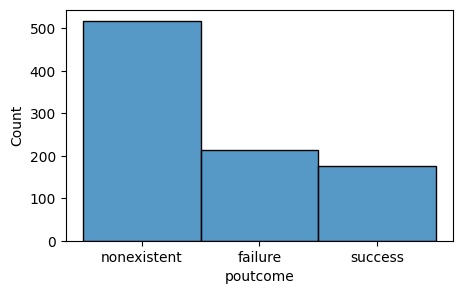

In [13]:
mayores_60 = dataframe.query("age > 60")['poutcome']

plt.figure(figsize = (5,3))
sns.histplot(data = mayores_60)
plt.show()

Contrario a lo que se esperaba según hipótesis personal, no existe una diferencia marcada entre éxitos y fracasos de la campaña anterior entre la población mayor a 60 años.

In [14]:
dataframe.query("poutcome == 'nonexistent'")['previous'].value_counts()

previous
0    35551
Name: count, dtype: int64

A partir de una hipótesis personal, queda demostrado que para los clientes que no existen resultados de la campaña de marketing anterior, es porque nunca fueron contactatos, y no porque sea un dato faltante.

In [15]:
dataframe.query("default == 'unknown'")['previous'].value_counts()

previous
0    8021
1     523
2      44
3       6
4       2
Name: count, dtype: int64

In [16]:
dataframe.query("marital == 'unknown'")['previous'].value_counts()

previous
0    62
1    14
2     4
Name: count, dtype: int64

In [17]:
dataframe.query("housing == 'unknown'")['previous'].value_counts()

previous
0    851
1    110
2     18
3      7
4      4
Name: count, dtype: int64

In [18]:
dataframe.query("loan == 'unknown'")['previous'].value_counts()

previous
0    851
1    110
2     18
3      7
4      4
Name: count, dtype: int64

No se puede asumir algo similar para los valores unknown de loan, default, marital y housing. Además se necesitaría conocer del negocio a profundidad para comprender el origen de estos datos y qué significan. No pueden asumirse en primera instancia como datos faltantes, puede que simplemente sean etiquetas para reportar que el cliente no quiso dar dicha información.

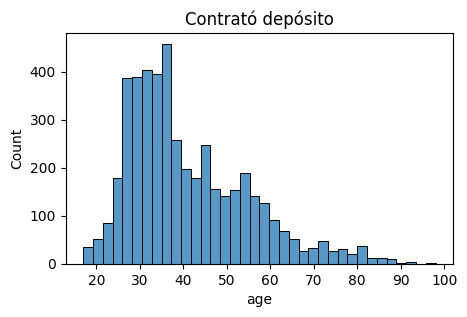

In [19]:
exitos_edad = dataframe.query("y == 'yes'")['age']

plt.figure(figsize = (5,3))
sns.histplot(data = exitos_edad).set(title = 'Contrató depósito')
plt.show()

Aprox. entre 25 y 45 años, se acumula la mayoría de los clientes que contratan un depósito a largo plazo.

- ### Análisis multivariante:

##### Para categóricas

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_34611/3110999583.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_34611/3110999583.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

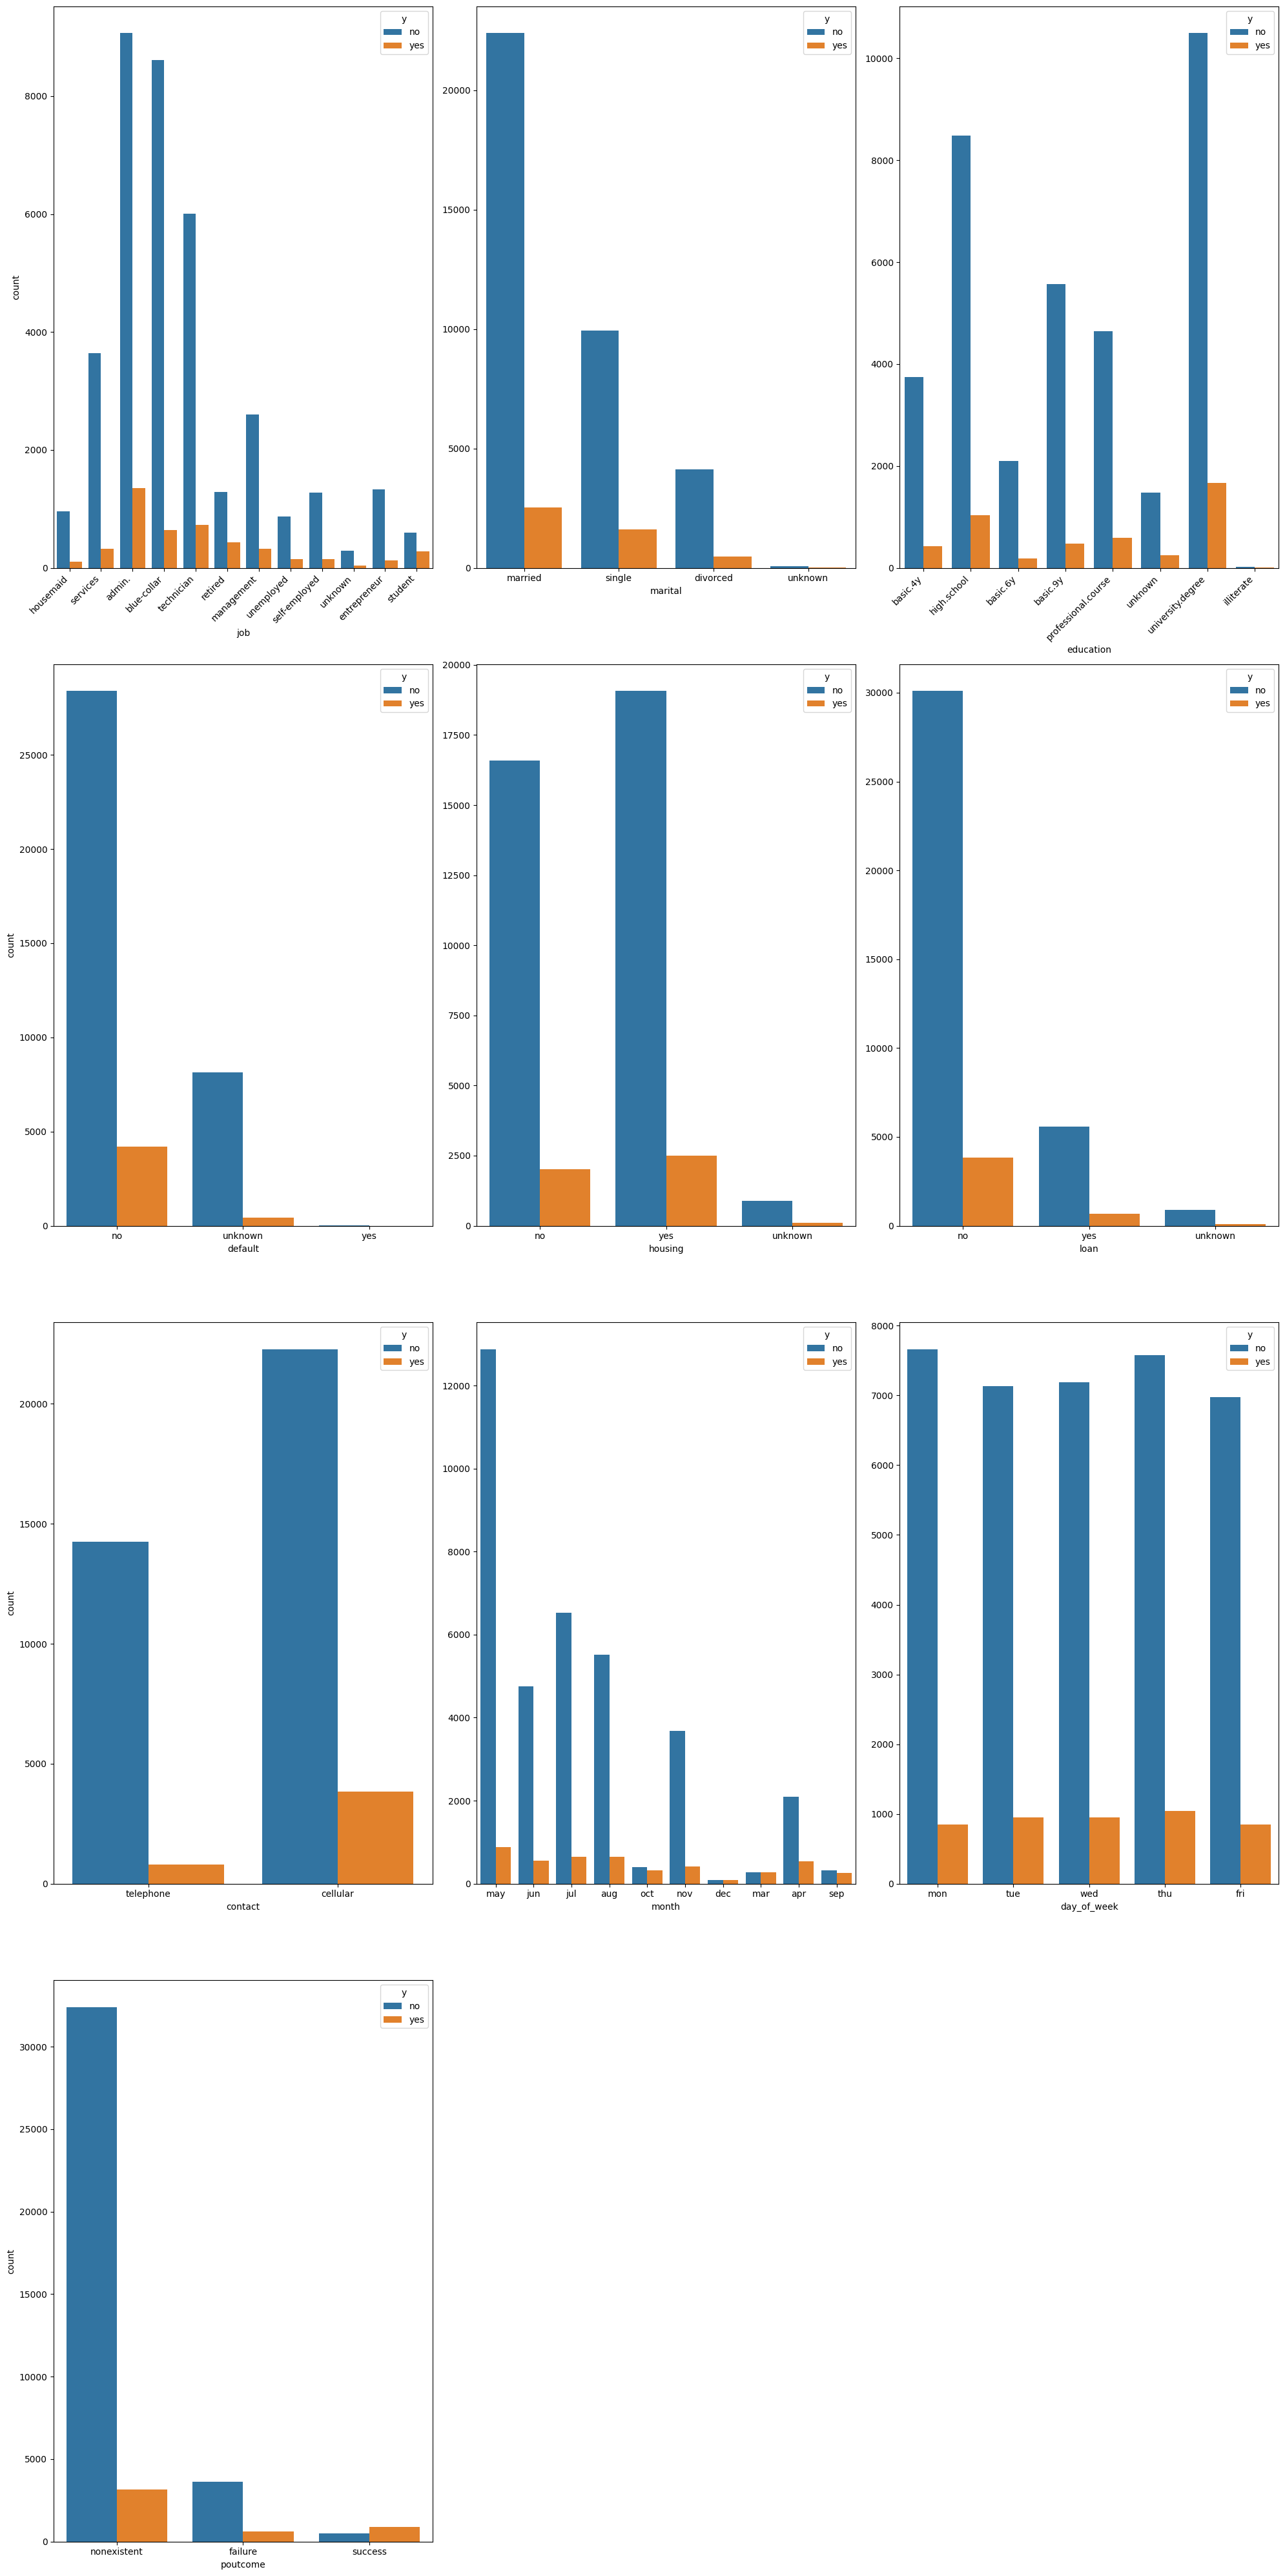

In [20]:
fig, axis = plt.subplots(4, 3, figsize = (20,40))

sns.countplot(ax = axis[0,0], data = dataframe, x = 'job', hue = 'y')
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
sns.countplot(ax = axis[0,1], data = dataframe, x = 'marital', hue = 'y').set(ylabel = None)
sns.countplot(ax = axis[0,2], data = dataframe, x = 'education', hue = 'y').set(ylabel = None)
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')

####

sns.countplot(ax = axis[1,0], data = dataframe, x = 'default', hue = 'y')
sns.countplot(ax = axis[1,1], data = dataframe, x = 'housing', hue = 'y').set(ylabel = None)
sns.countplot(ax = axis[1,2], data = dataframe, x = 'loan', hue = 'y').set(ylabel = None)

####

sns.countplot(ax = axis[2,0], data = dataframe, x = 'contact', hue = 'y')
sns.countplot(ax = axis[2,1], data = dataframe, x = 'month', hue = 'y').set(ylabel = None)
sns.countplot(ax = axis[2,2], data = dataframe, x = 'day_of_week', hue = 'y').set(ylabel = None)

####

sns.countplot(ax = axis[3,0], data = dataframe, x = 'poutcome', hue = 'y')

subplots_remove2 = [axis[3, 1], axis[3, 2]]

for ax in subplots_remove2:

    fig.delaxes(ax)

plt.tight_layout()

plt.show()


In [21]:
#Marital and  query
len_married_yes = len(dataframe.query("marital == 'married' & y == 'yes'"))
len_married_no = len(dataframe.query("marital == 'married' & y == 'no'"))

len_divorced_yes = len(dataframe.query("marital == 'divorced' & y == 'yes'"))
len_divorced_no = len(dataframe.query("marital == 'divorced' & y == 'no'"))

len_single_yes = len(dataframe.query("marital == 'single' & y == 'yes'"))
len_single_no = len(dataframe.query("marital == 'single' & y == 'no'"))

print(f'Relación no contrato depósito vs contrato de depósito para casados es: {len_married_no/len_married_yes}')
print(f'Relación no contrato depósito vs contrato de depósito para divorciados es: {len_divorced_no/len_divorced_yes}')
print(f'Relación no contrato depósito vs contrato de depósito para solteros es: {len_single_no/len_single_yes}')

Relación no contrato depósito vs contrato de depósito para casados es: 8.846305807981036
Relación no contrato depósito vs contrato de depósito para divorciados es: 8.686974789915967
Relación no contrato depósito vs contrato de depósito para solteros es: 6.1382716049382715


In [22]:
#Loan and  query
loan_yes1 = len(dataframe.query("loan == 'yes' & y == 'yes'"))
loan_yes2 = len(dataframe.query("loan == 'yes' & y == 'no'"))

loan_no1 = len(dataframe.query("loan == 'no' & y == 'yes'"))
loan_no2 = len(dataframe.query("loan == 'no' & y == 'no'"))

print(f"Relación no contrato depósito vs contrato de depósito para los que tienen préstamo personal "
      f"es: {loan_yes2/loan_yes1}")

print(f"Relación no contrato depósito vs contrato de depósito para los que no tienen préstamo personal "
      f"es: {loan_no2/loan_no1}")

Relación no contrato depósito vs contrato de depósito para los que tienen préstamo personal es: 8.14787701317716
Relación no contrato depósito vs contrato de depósito para los que no tienen préstamo personal es: 7.817355157183684


- Sólo hay una clase para la cual el número de personas que hayan contratado el depósito de largo plazo es mayor que los que no lo hayan contratado. Este es el caso para los clientes que se tuvo éxito en la campaña de marketing previa.
- El mes que tiene mayor relación entre servicio no contratado y contratado es Mayo.
- No existe diferencia destacable para la relación de servicio contratado y no contratado entre los días de la semana.
- Via telefónica es una peor relación para los servicios contratados, respecto a via celular.
- La población que tiene una mejor relación de contratación del depósito, son los solteros, para los casados y divorciados el comportamiento es muy similar.
- Las personas que actualmente poseen un crédito, no accedieron al servicio.
- La relación entre servicion contratato y no contratado en la población que posee un préstamo de vivienda, es similar.
- Los que no poseen préstamo personal tienden a contratar con un poco más de frecuencia el depósito de largo plazo.

- ### Análisis Numérico-Categórico completo:

In [23]:
dataframe.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
#Normalizacion de las variables categóricas
dataframe["job_n"] = pd.factorize(dataframe["job"])[0]
dataframe["marital_n"] = pd.factorize(dataframe["marital"])[0]
dataframe["education_n"] = pd.factorize(dataframe["education"])[0]
dataframe["default_n"] = pd.factorize(dataframe["default"])[0]
dataframe["housing_n"] = pd.factorize(dataframe["housing"])[0]
dataframe["loan_n"] = pd.factorize(dataframe["loan"])[0]
dataframe["contact_n"] = pd.factorize(dataframe["contact"])[0]
dataframe["month_n"] = pd.factorize(dataframe["month"])[0]
dataframe["day_of_week_n"] = pd.factorize(dataframe["day_of_week"])[0]
dataframe["poutcome_n"] = pd.factorize(dataframe["poutcome"])[0]
dataframe["y_n"] = pd.factorize(dataframe["y"])[0]

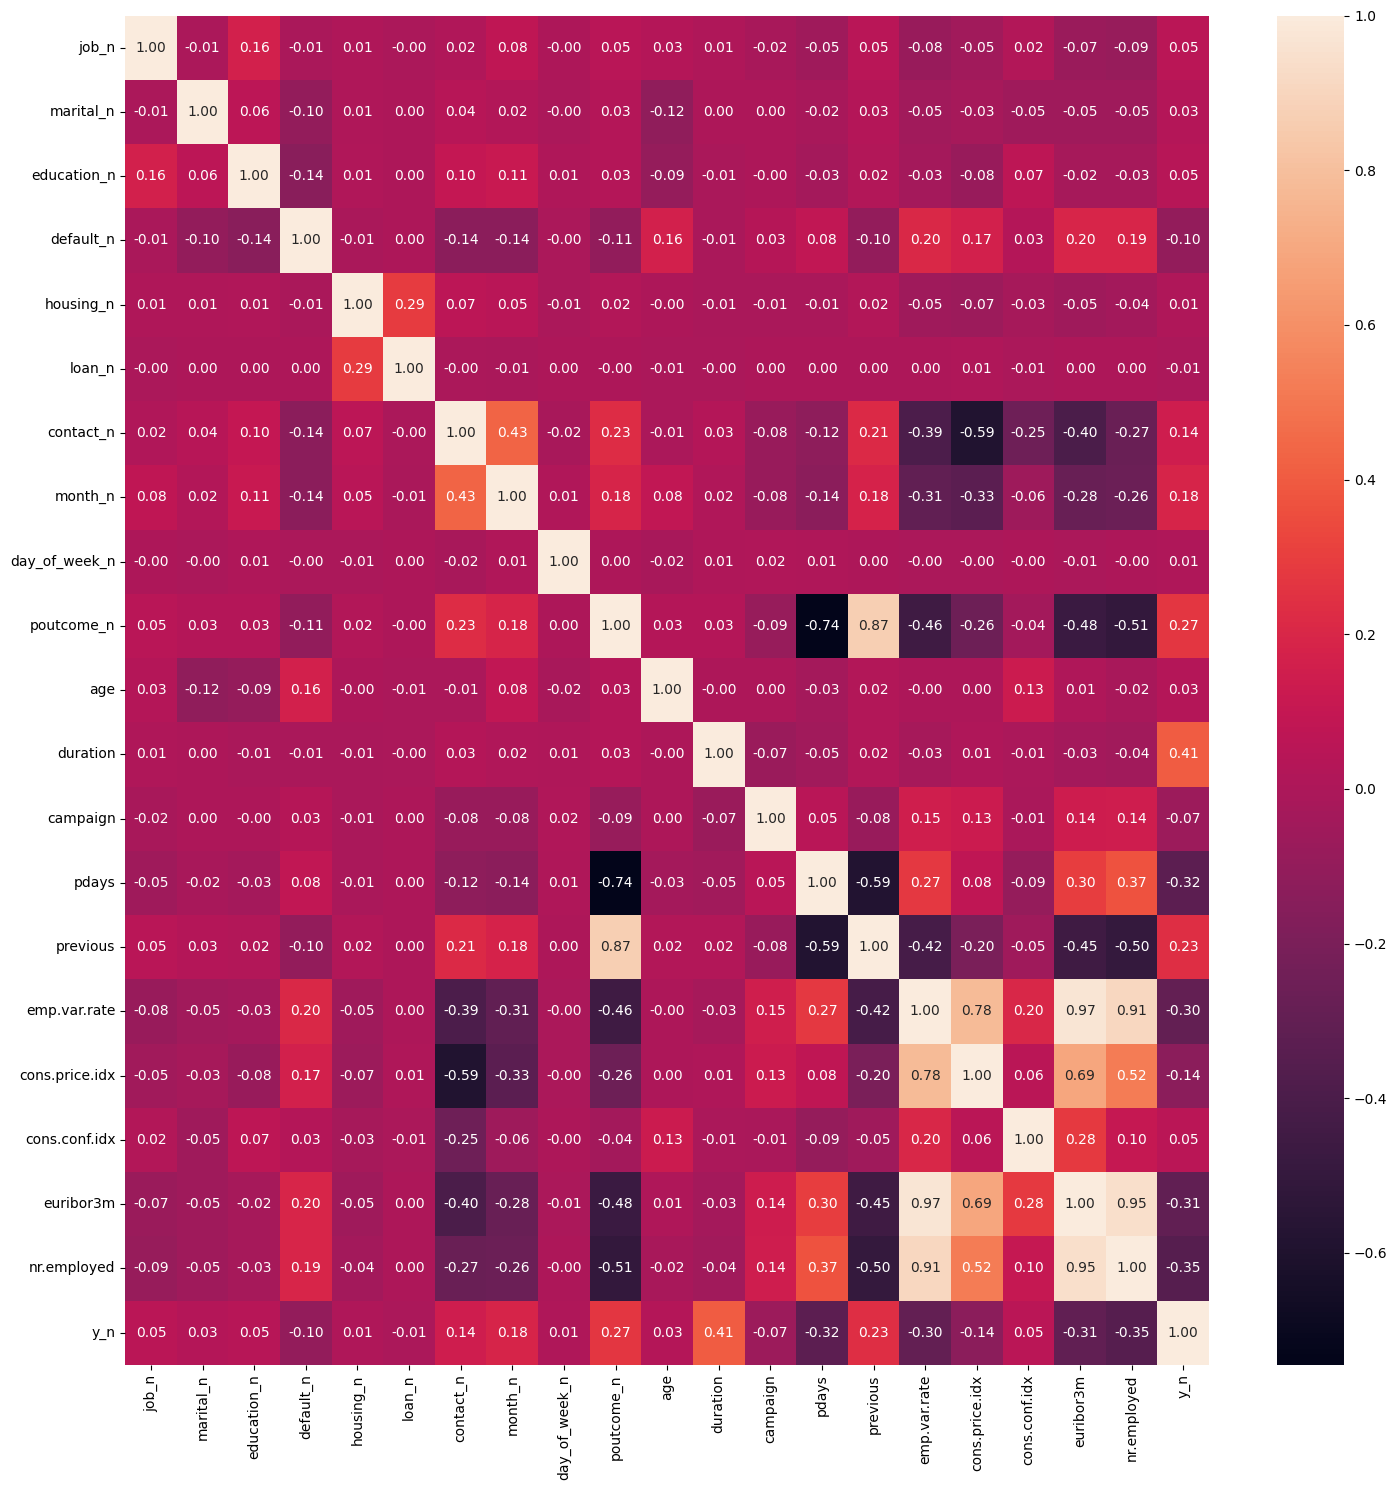

In [25]:
plt.figure(figsize = (15,15))

sns.heatmap(dataframe[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
                       'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'age', 'duration', 'campaign',
                       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                       'nr.employed', 'y_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

- Ya que se va a utilizar un modelo de regresión logística, se eliminan variables que tienen alta correlación entre sí para evitar problemas de multicolinealidad. Esto ocurre entre "emp.var.rate", "nr.employed" y "euribor3m". Se decide eliminar las columnas de "emp.var.rate" y "nr.employed", ya que "euribor3m" tiene la más alta correlación con ambas, además es un indicador relacionado con los tipos de interés, lo cual obviamente afecta la contratación de un depósito a largo plazo.
- Entre las relaciones más destacables están:
    - A mayor duración del contacto, mayor probabilidad de contratación de depósito.
    - A mayor cantidad de contactos en la campaña previa, mayor probabilidad de contración del depósito.
    - A mayor éxito en la campaña previa, mayor éxito en la actual contratación.
    - A mayor número de contactos en la canmpaña anterior, mejor resultado en dicha campaña.

In [26]:
dataframe.drop(["nr.employed","emp.var.rate"], axis = 1, inplace = True)

Se escalan los datos con StandardScaler este método es menos sensible a los outliers, no se eliminan outliers, se desea esperar el rendimiento del modelo y en dado caso se podrian usar métodos de regularización antes de eliminar datos.

In [27]:
dataframe.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'y', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n',
       'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n'],
      dtype='object')

In [28]:
dataframe.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'], axis = 1, inplace = True)

In [29]:
#Primero se separan los conjuntos de train y test
from sklearn.model_selection import train_test_split

X = dataframe.drop(['y_n'], axis = 1)
y = dataframe['y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
n_columns = X.columns.tolist()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = n_columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = n_columns)

#### - Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
y_predict = model.predict(X_test_scaled)
y_predict

array([1, 0, 0, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

precision_base = accuracy_score(y_test, y_predict)
print(f'La precisión del modelo base fue de: {precision_base}')

La precisión del modelo base fue de: 0.9042010684798446


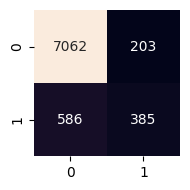

In [35]:
from sklearn.metrics import confusion_matrix

deposit = confusion_matrix(y_test, y_predict)

# Dibujaremos esta matriz para hacerla más visual
deposit_df = pd.DataFrame(deposit)
plt.figure(figsize = (2, 2))
sns.heatmap(deposit_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

- 7062 verdaderos positivos, es decir, se predijo ese número de no contratos, y efectivamente coincidían con la clase real.
- 385 verdaderos negativos, es decir, se predijo ese número de contratos, y efectivamente coincidían con la clase real.
- 203 falsos positivos, es decir, se predijo ese número de no contratos, y no coincidían con la clase real.
- 586 falsos negativos, es decir, se predijo ese número de contratos, y no coincidían con la clase real.

Se intentará mejorar la precisión del modelo a partir de la aplicación de hiperparámetros.
Ya que no se tiene una idea inicial del rango correcto para cada uno, se usa RandomizedSearchCV.
Además, se trata de un conjunto de datos grande.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'penalty':['l1','l2','elasticnet',None],
    'C':np.logspace(-4, 4, 20),    
    'solver':["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]
}

random_searc = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_jobs=-1, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_searc

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga',
                                                   'newton-cholesky']},
                   random_state=42, scoring='accuracy')

In [37]:
random_searc.fit(X_train_scaled,y_train)

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/linear_model/_logisti

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga',
                                                   'newton-cholesky']},
                   random_state=42, scoring='accuracy')

In [38]:
print(f"Mejores hiperparámetros: {random_searc.best_params_}")

Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l1', 'C': 4.281332398719396}


In [39]:
model_random_search = LogisticRegression(solver = "saga", penalty = "l1", C = 4.281332398719396)
model_random_search.fit(X_train_scaled, y_train)
y_predict_random = model_random_search.predict(X_test_scaled)

precision_random = accuracy_score(y_test, y_predict_random)
print(f'La precisión del modelo base fue de: {precision_random}')

La precisión del modelo base fue de: 0.9043224866440019


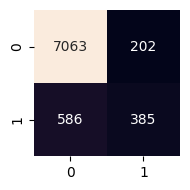

In [40]:
deposit_rand = confusion_matrix(y_test, y_predict_random)

# Dibujaremos esta matriz para hacerla más visual
deposit_df_rand = pd.DataFrame(deposit_rand)
plt.figure(figsize = (2, 2))
sns.heatmap(deposit_df_rand, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Apenas se logró una mejoría de una centésima en la precisión, de igual forma el rendimiento del modelo es alto.